In [30]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [31]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    index=np.arange(0,N,1)
    for k in index:
        for n in index:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [32]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    index=np.arange(0,N,1)
    for k in index:
        for n in index:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [33]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    index=np.arange(0,N,1)
    for k in index:
        for n in index:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [34]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    index=np.arange(0,N,1)
    for k in index: 
        for n in index:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [35]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])/math.sqrt(2)
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)
    

In [36]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

In [37]:
def general_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x    
        
        


In [38]:
def general_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [39]:
def dot_prod(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [40]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [41]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [42]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=general_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=general_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=general_inverse_transform(2,Xm)
        err=np.append(err,dot_prod(x,xm,N))
    return err 

[[  3.18135054e+01+30.36071458j]
 [  1.87464616e+00 -2.05678995j]
 [ -1.12632495e+00 +3.01383058j]
 [  6.97021436e-02 +3.03446823j]
 [  2.79816610e-02 -1.78661303j]
 [ -3.24530578e+00 +4.29144267j]
 [ -1.82962673e+00 -1.40253462j]
 [  3.45227447e+00 +0.08367556j]
 [ -1.25515230e-02 +1.55999898j]
 [  3.32759422e+00 -0.53517895j]
 [ -1.62323830e+00 +2.09062994j]
 [  2.10310845e-01 +1.49943953j]
 [  2.43894220e+00 -2.73487764j]
 [  3.56628389e+00 +1.21630117j]
 [ -1.71283148e+00 +1.55239042j]
 [ -2.64630989e+00 -2.2070825j ]
 [  3.59030468e+00 +2.15776696j]
 [  1.07896431e+00 +3.80653571j]
 [ -1.89127388e+00 -0.43756781j]
 [ -1.86535380e+00 -1.30447309j]
 [  2.01001485e-01 +1.52337991j]
 [  3.37007341e+00 -0.54363869j]
 [ -5.68180432e-01 +5.79923018j]
 [  2.45087399e+00 -0.62286527j]
 [  3.00057382e+00 -6.60392137j]
 [ -2.09710591e+00 +0.28629991j]
 [  6.31503465e+00 +1.70258572j]
 [ -6.81371595e-01 +4.74741552j]
 [ -4.08569941e-01 -1.24015218j]
 [ -1.24072344e+00 -0.67779446j]
 [  3.0249

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(64,)
[[  2.24955454e+01+21.46826716j]
 [  1.59171565e+00 -0.68322518j]
 [  1.96445601e+00 -0.14666742j]
 [ -3.19821073e+00 +3.11300156j]
 [  8.52765661e-01 -4.49929943j]
 [ -4.04619727e-01 +2.07570836j]
 [ -7.36368207e+00 -1.89628367j]
 [  1.17483291e+00 +0.94400054j]
 [  2.28409218e+00 -0.84255611j]
 [  5.68474341e-01 -0.45468806j]
 [  1.00671239e-01 +2.76370117j]
 [  3.53531119e+00 +2.4405357j ]
 [  1.55237738e+00 -3.21176364j]
 [  3.38355451e-01 -4.1959507j ]
 [  1.62329027e+00 +1.64813015j]
 [  1.12473410e+00 +0.13097648j]
 [  2.20820926e+00 +4.27713759j]
 [ -5.22987854e+00 -4.3111944j ]
 [  5.15979526e-01 -1.7597951j ]
 [ -2.11357450e+00 +3.31534975j]
 [ -2.99440330e+00 +0.13958535j]
 [  3.36253544e+00 +3.83994672j]
 [ -2.90345472e+00 +3.89905293j]
 [  4.88272981e-01 +0.50020963j]
 [  1.54350573e+00 +1.80616428j]
 [ -5.07389592e-01 -0.08505188j]
 [ -1.69887003e-01 -1.72260252j]
 [  1.58631033e+00 -1.06651003j]
 [  1.46557586e-01 -1.24934396j]
 [  3.01180235e+00 +1.30654864j]
 [ -

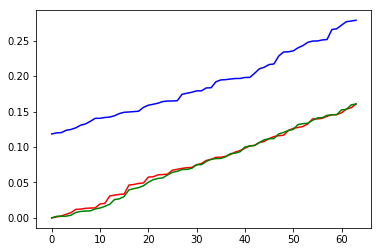

In [43]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=general_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=general_inverse_transform(0,X)
plt.show()
